In [44]:
import torch 
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [45]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

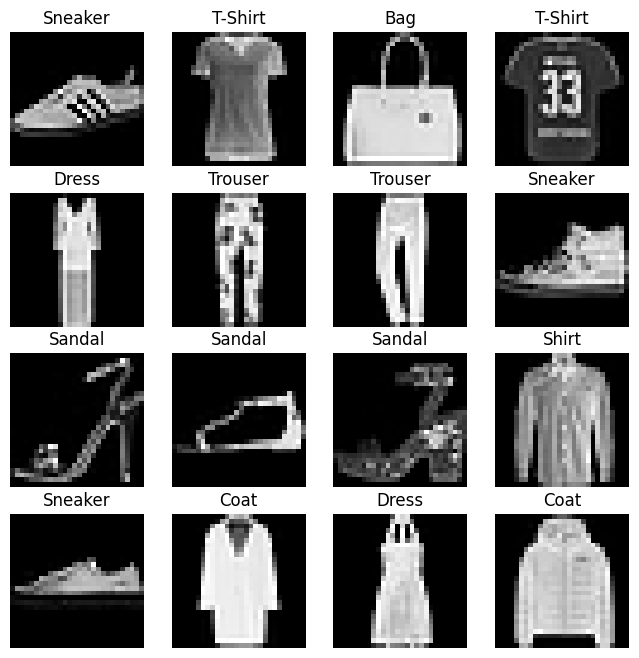

In [46]:
labels_map={
    0:"T-Shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}
figure = plt.figure(figsize=(8,8))
cols,rows=4,4
data_count=len(training_data.data)
for i in range(1,cols*rows+1):
    sample_idx=int(torch.randint(data_count,size=(1,)).item())
    plt.subplot(rows,cols,i)
    plt.axis("off")
    plt.imshow(training_data.data[sample_idx],cmap="gray")
    plt.title(label=labels_map[int( training_data.targets[sample_idx].item())])
plt.show()

In [47]:
train_dataloader = DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)

Feature shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


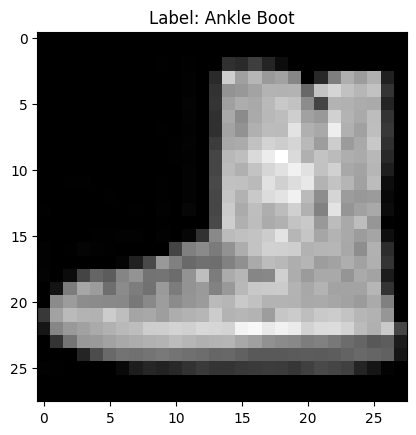

In [48]:
train_features,train_labels=next(iter(train_dataloader))

print(f"Feature shape: {train_features.shape}")
print(f"Labels shape: {train_labels.shape}")

img = train_features[0].squeeze()
label = train_labels[0].item()
plt.imshow(img,cmap="gray")
plt.title(f"Label: {labels_map[label]}")
plt.show()

In [49]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
            nn.ReLU()
        )
    def forward(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

In [50]:
model = NeuralNetwork()

In [51]:
model.eval()
with torch.inference_mode():
    predictions = model(train_features)
    print(predictions[0],labels_map[int(predictions[0].argmax(dim=0))])

tensor([0.0000, 0.0000, 0.0726, 0.0000, 0.0298, 0.0000, 0.0000, 0.0000, 0.0181,
        0.0000]) Pullover


In [52]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [57]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X, y

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 100 == 0:
        #     loss, current = loss.item(), batch * len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [54]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X, y
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )


In [120]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")


Epoch 1
-------------------------------
Test Error: 
 Accuracy: 66.7%, Avg loss: 0.015829 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 66.8%, Avg loss: 0.015740 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 67.0%, Avg loss: 0.015675 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 67.0%, Avg loss: 0.015589 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 67.2%, Avg loss: 0.015487 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 67.2%, Avg loss: 0.015393 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 67.5%, Avg loss: 0.015295 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 67.4%, Avg loss: 0.015228 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 67.5%, Avg loss: 0.015151 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 67.7%, Avg loss: 0.015168 

Epoch 11
-------------------------------
Test Error: 
 Accuracy: 67.8%, Avg los

In [121]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")


Saved PyTorch Model State to model.pth


In [143]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
error=0
test=1000
for i in range(test):
    index= int(torch.randint(len(test_data),size=(1,)).item())
    model.eval()
    x, y = test_data[index][0], test_data[index][1]
    with torch.no_grad():
        pred = model(x)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        if predicted != actual:
            error+=1
        print(f'Predicted: "{predicted}", Actual: "{actual}"')
print(f"Accuracy: {(100*(test-error)/test):>0.1f}%")

Predicted: "Bag", Actual: "Bag"
Predicted: "Dress", Actual: "Dress"
Predicted: "Pullover", Actual: "Coat"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Bag", Actual: "Bag"
Predicted: "Sneaker", Actual: "Sneaker"
Predicted: "Dress", Actual: "T-shirt/top"
Predicted: "Bag", Actual: "Bag"
Predicted: "Sneaker", Actual: "Ankle boot"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "T-shirt/top", Actual: "Ankle boot"
Predicted: "Shirt", Actual: "Shirt"
Predicted: "T-shirt/top", Actual: "T-shirt/top"
Predicted: "Dress", Actual: "T-shirt/top"
Predicted: "Shirt", Actual: "T-shirt/top"
Predicted: "T-shirt/top", Actual: "Ankle boot"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Pullover", Actual: "Coat"
Predicted: "Dress", Actual: "Dress"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "Dress", Actual: "Dress"
Predicted: "Shirt", Actual: "Shirt"
Predicted: "Dress", Actual: "Dress"
Predicted: "Shirt", Actual: "Coat"
Predicted: "Dress", Actual: "Shirt"
Predicted: "Sandal", Actua